In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# read data
train_data_df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
# check data
train_data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# check shape
train_data_df.shape

(891, 12)

In [5]:
# check for null values
train_data_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_data_df.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [7]:
# check correlation
train_data_df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
# check data types
train_data_df.dtypes == int

PassengerId     True
Survived        True
Pclass          True
Name           False
Sex            False
Age            False
SibSp           True
Parch           True
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [9]:
numeric_variables = train_data_df.select_dtypes(include=['int', 'float']).columns
numeric_variables

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

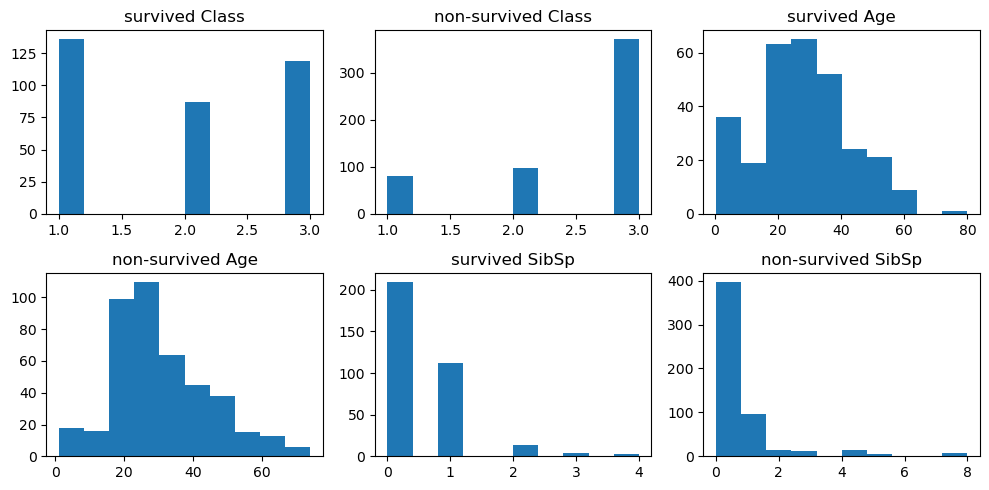

In [10]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

axes[0][0].hist(train_data_df[train_data_df.Survived == 1]['Pclass'])
axes[0][0].set_title('survived Class')

axes[0][1].hist(train_data_df[train_data_df.Survived != 1]['Pclass'])
axes[0][1].set_title('non-survived Class')

axes[0][2].hist(train_data_df[train_data_df.Survived == 1]['Age'])
axes[0][2].set_title('survived Age')

axes[1][0].hist(train_data_df[train_data_df.Survived != 1]['Age'])
axes[1][0].set_title('non-survived Age')

axes[1][1].hist(train_data_df[train_data_df.Survived == 1]['SibSp'])
axes[1][1].set_title('survived SibSp')

axes[1][2].hist(train_data_df[train_data_df.Survived != 1]['SibSp'])
axes[1][2].set_title('non-survived SibSp')

plt.tight_layout()
plt.show()

In [11]:
# impute age with median
train_data_df['Age'].fillna(train_data_df['Age'].median(),inplace=True)

In [12]:
# check for null values
train_data_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# check cabin
train_data_df['Cabin'].value_counts

<bound method IndexOpsMixin.value_counts of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object>

In [14]:
# drop cabin column
train_data_df.drop('Cabin',axis=1,inplace=True)

In [15]:
# drop name column, ticket column
train_data_df.drop(["Name","Ticket"],axis=1,inplace=True)

In [16]:
# drop passenger id
train_data_df.drop(["PassengerId"],axis=1,inplace=True)

In [17]:
# check sex column
train_data_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
# # make male = 1, female = 0
# train_data_df['Sex'] = train_data_df['Sex'].map({'male': 1, 'female': 0})

In [19]:
# check df
train_data_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
# convert age as int
train_data_df['Age'] = train_data_df['Age'].astype(int)

In [21]:
# check embarked column
train_data_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
# one hot encode Embarked column and drop it from the original df
encoded_df = pd.get_dummies(train_data_df['Embarked'], prefix='Embarked')
df_encoded = pd.concat([train_data_df, encoded_df], axis=1)
df_encoded = df_encoded.drop('Embarked', axis=1)

In [23]:
# one hot encode Class column and drop it from the original df
encoded_df = pd.get_dummies(df_encoded['Pclass'], prefix='Embarked')
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
df_encoded = df_encoded.drop('Pclass', axis=1)

In [24]:
# one hot encode Sex column and drop it from the original df
encoded_df = pd.get_dummies(df_encoded['Sex'], prefix='Sex')
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
df_encoded = df_encoded.drop('Sex', axis=1)

In [25]:
# Splitting the data into features and target variable
X = df_encoded.drop('Survived', axis=1)  # Features
y = df_encoded['Survived']  # Target variable

In [26]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
import tensorflow as tf

# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [29]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
23/23 [==============================] - 2s 16ms/step - loss: 0.5899 - accuracy: 0.7121 - val_loss: 0.4684 - val_accuracy: 0.7989
Epoch 2/20
23/23 [==============================] - 0s 4ms/step - loss: 0.4380 - accuracy: 0.8006 - val_loss: 0.4309 - val_accuracy: 0.8212
Epoch 3/20
23/23 [==============================] - 0s 5ms/step - loss: 0.4137 - accuracy: 0.8272 - val_loss: 0.4276 - val_accuracy: 0.8212
Epoch 4/20
23/23 [==============================] - 0s 4ms/step - loss: 0.4020 - accuracy: 0.8371 - val_loss: 0.4321 - val_accuracy: 0.8212
Epoch 5/20
23/23 [==============================] - 0s 4ms/step - loss: 0.3955 - accuracy: 0.8385 - val_loss: 0.4259 - val_accuracy: 0.8156
Epoch 6/20
23/23 [==============================] - 0s 4ms/step - loss: 0.3907 - accuracy: 0.8287 - val_loss: 0.4254 - val_accuracy: 0.8101
Epoch 7/20
23/23 [==============================] - 0s 5ms/step - loss: 0.3772 - accuracy: 0.8511 - val_loss: 0.4230 - val_accuracy: 0.8212
Epoch 8/20
23/23 [=

In [31]:
# predict the test data with new model
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [32]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
# applying the same pre-processing steps
# impute age with median
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)

# drop cabin column
test_df.drop('Cabin',axis=1,inplace=True)

# drop name column, ticket column
test_df.drop(["Name","Ticket"],axis=1,inplace=True)

# drop PassengerId
test_df.drop(["PassengerId"],axis=1,inplace=True)


# make male = 1, female = 0
# test_df['Sex'] = test_df['Sex'].map({'male': 1, 'female': 0})

# convert age as int
test_df['Age'] = test_df['Age'].astype(int)

# fill null values with 0
test_df['Fare'].fillna(0, inplace=True)

# one hot encode Embarked column and drop it from the original df
encoded_df = pd.get_dummies(test_df['Embarked'], prefix='Embarked')
df_encoded = pd.concat([test_df, encoded_df], axis=1)
df_encoded = df_encoded.drop('Embarked', axis=1)

# one hot encode Class column and drop it from the original df
encoded_df = pd.get_dummies(df_encoded['Pclass'], prefix='Embarked')
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
df_encoded = df_encoded.drop('Pclass', axis=1)

# one hot encode Sex column and drop it from the original df
encoded_df = pd.get_dummies(df_encoded['Sex'], prefix='Sex')
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
df_encoded = df_encoded.drop('Sex', axis=1)

df_encoded_transformed = scaler.transform(df_encoded)

In [34]:
df_encoded_transformed

array([[ 0.36996802, -0.47072241, -0.47934164, ...,  0.8882256 ,
        -0.7243102 ,  0.7243102 ],
       [ 1.36950801,  0.37992316, -0.47934164, ...,  0.8882256 ,
         1.38062393, -1.38062393],
       [ 2.52282338, -0.47072241, -0.47934164, ..., -1.1258401 ,
        -0.7243102 ,  0.7243102 ],
       ...,
       [ 0.67751879, -0.47072241, -0.47934164, ...,  0.8882256 ,
        -0.7243102 ,  0.7243102 ],
       [-0.16824582, -0.47072241, -0.47934164, ...,  0.8882256 ,
        -0.7243102 ,  0.7243102 ],
       [-0.16824582,  0.37992316,  0.78470001, ...,  0.8882256 ,
        -0.7243102 ,  0.7243102 ]])

In [35]:
y_pred = model.predict(df_encoded_transformed)

14/14 [==============================] - 0s 2ms/step


In [36]:
y_pred.shape

(418, 1)

In [37]:
threshold = 0.5
y_pred_classes = (y_pred > threshold).astype(int)

In [38]:
y_pred_classes.shape

(418, 1)

In [39]:
# predict the test data with new model
test_df2 = pd.read_csv('/kaggle/input/titanic/test.csv')

In [40]:
final_df = pd.DataFrame()

In [41]:
final_df['PassengerId'] = test_df2.PassengerId
final_df['Survived'] = y_pred_classes

In [42]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [43]:
# write to csv file
final_df.to_csv('submission.csv', index=False)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7988826815642458


In [45]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

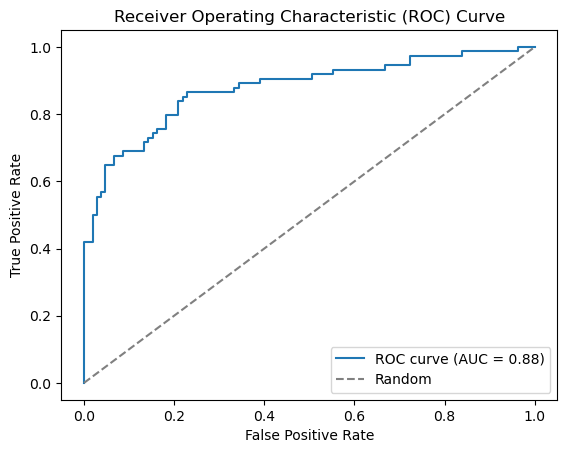

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_pred_probs = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_probs)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [47]:
# Predict on the unseen test set
y_pred = model.predict(df_encoded_transformed)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [48]:
final_df['PassengerId'] = test_df2.PassengerId
final_df['Survived'] = y_pred

In [49]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [50]:
# write to csv file
final_df.to_csv('submission.csv', index=False)